In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


data = pd.read_csv('data/data3lab.csv', delimiter=" ")
pd.options.display.max_columns = None
pd.options.display.max_rows = None

renamedData = data.rename({
                          '3:Temperature_Comedor_Sensor': 'температура на кухне',
                          '4:Temperature_Habitacion_Sensor': 'температура в комнате',
                          '5:Weather_Temperature': 'прогноз',
                          '6:CO2_Comedor_Sensor': 'СО2 на кухне',
                          '7:CO2_Habitacion_Sensor': 'СО2 в комнате',
                          '8:Humedad_Comedor_Sensor': 'влажность на кухне',
                          '9:Humedad_Habitacion_Sensor': 'влажность в комнате',
                          '10:Lighting_Comedor_Sensor': 'освещение на кухне',
                          '11:Lighting_Habitacion_Sensor': 'освещение в комнате',
                          '22:Temperature_Exterior_Sensor': 'температура на улице',
                          '23:Humedad_Exterior_Sensor': 'влажность на улице',
    
                          }, axis='columns')
columns = ["температура на кухне", "температура в комнате", "прогноз", "СО2 на кухне", "СО2 в комнате", "влажность на кухне", "влажность в комнате", "освещение на кухне", "освещение в комнате", "температура на улице", "влажность на улице"]




In [84]:
x = renamedData[['температура на кухне', 'температура в комнате', 'прогноз', 'освещение на кухне', 'освещение в комнате']]
y = renamedData[['температура на улице']]
def splitData(x, y, train_size):
    random = np.random.randn(len(x))
    mask = random < np.percentile(random, train_size * 100)
    trainX, testX, trainY, testY = x[mask], x[~mask], y[mask], y[~mask]
    return trainX, testX, trainY, testY

xTrain, xTest, yTrain, yTest = splitData(x, y, 0.67)

model = linear_model.LinearRegression()
model.fit(xTrain, yTrain)
prediction = model.predict(xTest)


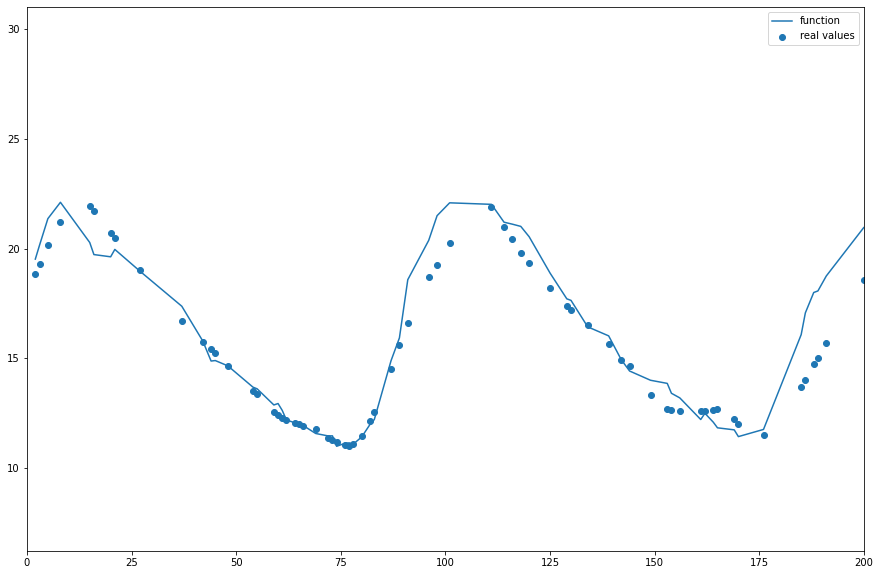

Mean squared error: 1.53
Coefficient of determination: 0.92


In [85]:
plt.figure(figsize=(15, 10))
plt.scatter(xTest.index, yTest['температура на улице'], label="real values")
plt.plot(xTest.index, prediction, label="function")
plt.legend()
plt.xlim((0, 200))
plt.show()
print("Mean squared error: %.2f" % mean_squared_error(yTest, prediction))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(yTest, prediction))

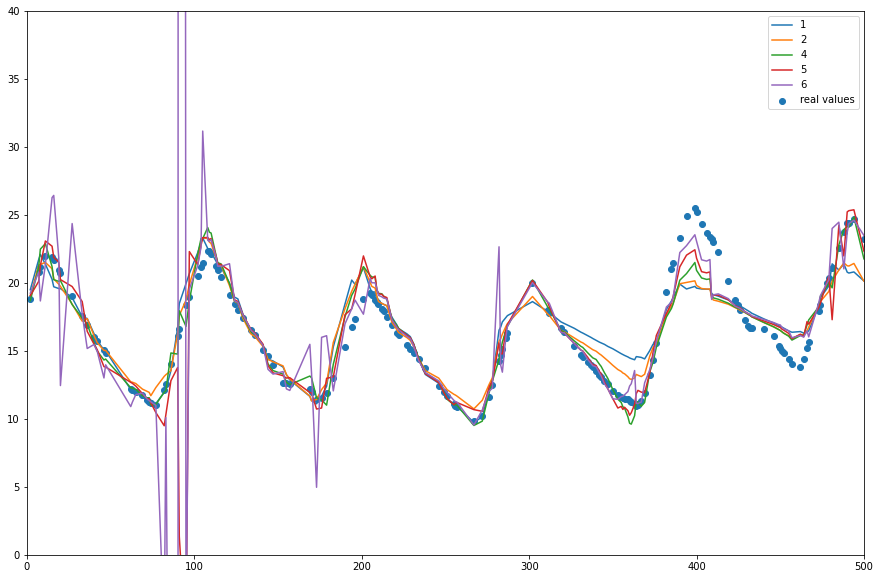

In [137]:
#  xTrain, xTest, yTrain, yTest = splitData(x, y, 0.67)


from sklearn.model_selection import cross_val_score
plt.figure(figsize=(15, 10))

plt.xlim((0, 500))
plt.ylim((0, 40))
xTrain, xTest, yTrain, yTest = splitData(x, y, 0.67)

degrees = [1, 2, 4, 5, 6]
scores = []
errors = []

plt.scatter(xTest.index, yTest['температура на улице'])
for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = linear_model.LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression),])
    pipeline.fit(xTrain, yTrain)
    
    scores.append(r2_score(yTest, prediction))
    
    errors.append(mean_squared_error(yTest, prediction))
    
    prediction = pipeline.predict(xTest)
    
    plt.plot(xTest.index, prediction)
    
    
plt.legend([*degrees, "real values"])
plt.show()

In [138]:
result = pd.DataFrame({"degree": degrees, "score": scores, "error": errors})
print(result)

   degree     score      error
0       1 -3.852739  92.005943
1       2  0.927005   1.383962
2       4  0.945191   1.039161
3       5  0.961403   0.731777
4       6  0.931521   1.298329
